In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

In [2]:
shots = pd.read_csv('.data/shots.csv')

In [3]:
shots.loc[:, 'freeze_frame'] = shots.loc[:, 'freeze_frame'].apply(ast.literal_eval)

In [23]:
shots.loc[:, 'freeze_frame'][200]

[{'freeze_frame': [{'location': [103.5, 42.6],
    'player': {'id': 47521, 'name': 'Alessia Russo'},
    'position': {'id': 23, 'name': 'Center Forward'},
    'teammate': True},
   {'location': [107.6, 29.8],
    'player': {'id': 31539, 'name': 'Leah Galton'},
    'position': {'id': 21, 'name': 'Left Wing'},
    'teammate': True},
   {'location': [117.8, 41.6],
    'player': {'id': 22032, 'name': 'Hannah Hampton'},
    'position': {'id': 1, 'name': 'Goalkeeper'},
    'teammate': False},
   {'location': [111.3, 38.4],
    'player': {'id': 19592, 'name': 'Harriet Scott'},
    'position': {'id': 2, 'name': 'Right Back'},
    'teammate': False},
   {'location': [110.9, 43.3],
    'player': {'id': 15574, 'name': 'Georgia Brougham'},
    'position': {'id': 3, 'name': 'Right Center Back'},
    'teammate': False},
   {'location': [105.3, 43.3],
    'player': {'id': 4984, 'name': 'Rachel Corsie'},
    'position': {'id': 5, 'name': 'Left Center Back'},
    'teammate': False},
   {'location': [90

In [24]:
def ff_unpacking(players):
    players = players[0]['freeze_frame']
    for i in players:
        if i['position']['name'] == 'Goalkeeper' and i['teammate'] == False:
            gk_loc = i['location']
            return gk_loc
        
sample = shots.loc[:, 'freeze_frame'][200]
        
        
ff_locs = pd.DataFrame()
for i in sample[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,True,47521,Alessia Russo,23,Center Forward,103.5,42.6
1,True,31539,Leah Galton,21,Left Wing,107.6,29.8
2,False,22032,Hannah Hampton,1,Goalkeeper,117.8,41.6
3,False,19592,Harriet Scott,2,Right Back,111.3,38.4
4,False,15574,Georgia Brougham,3,Right Center Back,110.9,43.3
5,False,4984,Rachel Corsie,5,Left Center Back,105.3,43.3
6,False,19500,Sarah Emma Mayling,12,Right Midfield,90.7,25.3
7,False,31568,Rebecca Holloway,6,Left Back,113.1,61.3


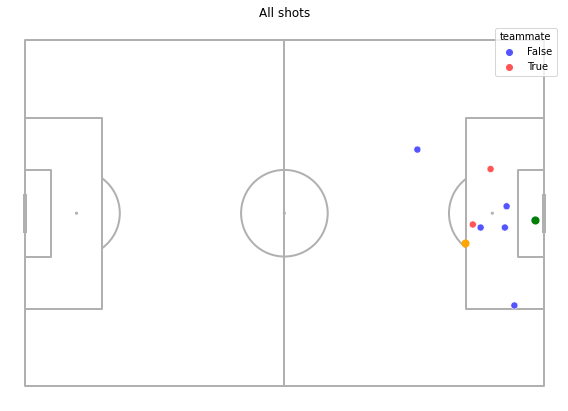

In [25]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

ax.scatter(ff_locs.loc[2, 'x'], ff_locs.loc[2, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[400, 'x_start'], shots.loc[400, 'y_start'], c = 'orange', s = 50)


#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [26]:
def ff_unpacking(players):
    players = players[0]['freeze_frame']
    for i in players:
        pl_loc = i['location']
        return pl_loc
        
sample = shots.loc[:, 'freeze_frame'][200]
        
        
ff_locs = pd.DataFrame()
for i in sample[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,True,47521,Alessia Russo,23,Center Forward,103.5,42.6
1,True,31539,Leah Galton,21,Left Wing,107.6,29.8
2,False,22032,Hannah Hampton,1,Goalkeeper,117.8,41.6
3,False,19592,Harriet Scott,2,Right Back,111.3,38.4
4,False,15574,Georgia Brougham,3,Right Center Back,110.9,43.3
5,False,4984,Rachel Corsie,5,Left Center Back,105.3,43.3
6,False,19500,Sarah Emma Mayling,12,Right Midfield,90.7,25.3
7,False,31568,Rebecca Holloway,6,Left Back,113.1,61.3


In [28]:
test = ff_locs.loc[~ff_locs['teammate'], :]
shooter = shots.loc[200, 'x_start'], shots.loc[200, 'y_start']
test

,teammate,player.id,player.name,position.id,position.name,x,y
2,False,22032,Hannah Hampton,1,Goalkeeper,117.8,41.6
3,False,19592,Harriet Scott,2,Right Back,111.3,38.4
4,False,15574,Georgia Brougham,3,Right Center Back,110.9,43.3
5,False,4984,Rachel Corsie,5,Left Center Back,105.3,43.3
6,False,19500,Sarah Emma Mayling,12,Right Midfield,90.7,25.3
7,False,31568,Rebecca Holloway,6,Left Back,113.1,61.3


In [48]:
def player_projection(shooter, defender, D):
    x1, y1 = shooter
    x2, y2 = defender
    S = (x2 - x1) / (120 - x1)
    O = D * (120 - x1) / (x2 - x1)
    E = ((y2 - y1) / S) + y1 - y2
    C = E + y2
    y4 = C + O
    y3 = C - O
    return y3, y4

In [49]:
defender = test.loc[3, ['x', 'y']]
player_projection(shooter, defender, 1)

(61.918181818181644, 48.099999999999945)